In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Policy Network from baselines
from stable_baselines3 import PPO

# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [2]:
# Test environment with random actions
done = True
env.reset()
# Render env with random actions, 5 times
for i in range(5):
    # Go through episode
    for j in range(5000):
        env.render() 
        # Random action
        observation, reward, done, info = env.step(env.action_space.sample())
        if done: 
            # Start the game
            env.reset()
# Close the game
env.close()

C:\Users\soner\AppData\Local\Programs\Python\Python310\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\soner\AppData\Local\Programs\Python\Python310\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [3]:
# Import packages to improve performace

# Turn image to grayscale
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt


In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# get simple movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# apply grayscaling
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [5]:
state = env.reset()

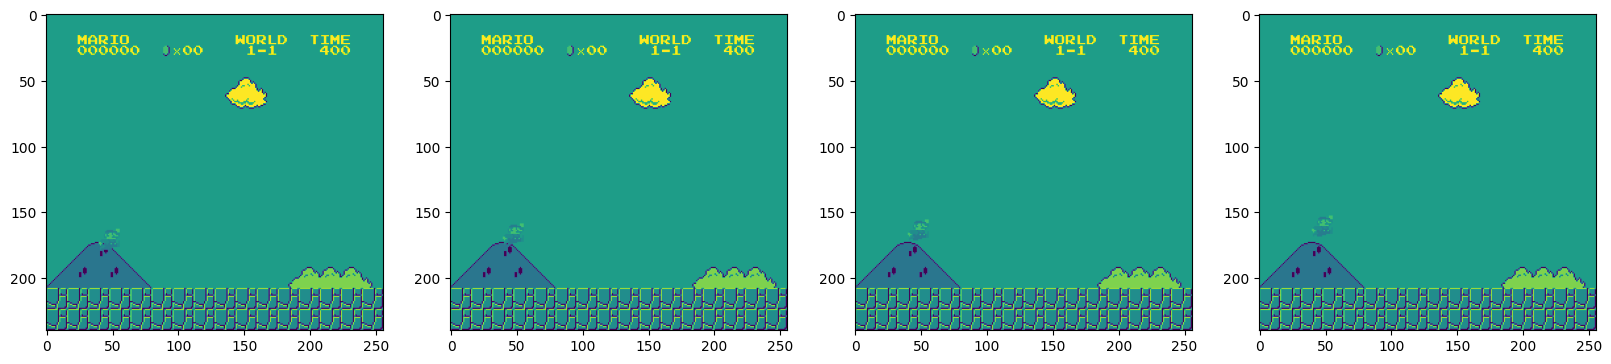

In [17]:
# Plot mario jumping, seeing what happens
state, reward, done, info = env.step([5])

plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [19]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback


In [20]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True


In [21]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [22]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [23]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.00001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [24]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_6
----------------------------
| time/              |     |
|    fps             | 110 |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 96          |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.006920784 |
|    clip_fraction        | 0.00371     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -0.0111     |
|    learning_rate        | 1e-05       |
|    loss                 | 71.9        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00625    |
|    value_loss           | 194         |
-----------------------------------------
-----------------

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 13           |
|    time_elapsed         | 72           |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 0.0098636625 |
|    clip_fraction        | 0.0715       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.77        |
|    explained_variance   | 0.00234      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0325       |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00832     |
|    value_loss           | 0.142        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 14           |
|    time_elapsed         | 78           |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 24         |
|    time_elapsed         | 134        |
|    total_timesteps      | 12288      |
| train/                  |            |
|    approx_kl            | 0.00909363 |
|    clip_fraction        | 0.0381     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.7       |
|    explained_variance   | -0.0046    |
|    learning_rate        | 1e-05      |
|    loss                 | 0.15       |
|    n_updates            | 230        |
|    policy_gradient_loss | -0.0049    |
|    value_loss           | 0.371      |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 25           |
|    time_elapsed         | 140          |
|    total_timesteps      | 12800        |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 35           |
|    time_elapsed         | 196          |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 0.0009834397 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.53        |
|    explained_variance   | -0.0853      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.536        |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.000425    |
|    value_loss           | 1.77         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 36          |
|    time_elapsed         | 201         |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 46         |
|    time_elapsed         | 256        |
|    total_timesteps      | 23552      |
| train/                  |            |
|    approx_kl            | 0.00817473 |
|    clip_fraction        | 0.0164     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.0693     |
|    learning_rate        | 1e-05      |
|    loss                 | 0.268      |
|    n_updates            | 450        |
|    policy_gradient_loss | -0.00176   |
|    value_loss           | 0.955      |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 47           |
|    time_elapsed         | 262          |
|    total_timesteps      | 24064        |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 57            |
|    time_elapsed         | 317           |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 0.00032136578 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.0924       |
|    learning_rate        | 1e-05         |
|    loss                 | 0.307         |
|    n_updates            | 560           |
|    policy_gradient_loss | 0.000123      |
|    value_loss           | 0.556         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 58           |
|    time_elapsed         | 323     

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 68           |
|    time_elapsed         | 378          |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0066665537 |
|    clip_fraction        | 0.0709       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.44        |
|    explained_variance   | -0.252       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.448        |
|    n_updates            | 670          |
|    policy_gradient_loss | -0.00264     |
|    value_loss           | 1.45         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 69          |
|    time_elapsed         | 384         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 79           |
|    time_elapsed         | 442          |
|    total_timesteps      | 40448        |
| train/                  |              |
|    approx_kl            | 0.0042074006 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.29        |
|    explained_variance   | -0.0229      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.144        |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.00301     |
|    value_loss           | 0.813        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 80           |
|    time_elapsed         | 448          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 90          |
|    time_elapsed         | 505         |
|    total_timesteps      | 46080       |
| train/                  |             |
|    approx_kl            | 0.008699817 |
|    clip_fraction        | 0.0172      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.811       |
|    learning_rate        | 1e-05       |
|    loss                 | 83.7        |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.000399   |
|    value_loss           | 295         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 91          |
|    time_elapsed         | 511         |
|    total_timesteps      | 46592 

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 101        |
|    time_elapsed         | 567        |
|    total_timesteps      | 51712      |
| train/                  |            |
|    approx_kl            | 0.00426927 |
|    clip_fraction        | 0.0594     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.25      |
|    explained_variance   | 0.895      |
|    learning_rate        | 1e-05      |
|    loss                 | 114        |
|    n_updates            | 1000       |
|    policy_gradient_loss | -0.000778  |
|    value_loss           | 319        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 102         |
|    time_elapsed         | 572         |
|    total_timesteps      | 52224       |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 112         |
|    time_elapsed         | 628         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.012855228 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.163       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.081       |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.00303    |
|    value_loss           | 0.694       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 113          |
|    time_elapsed         | 634          |
|    total_timesteps      | 5

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 123         |
|    time_elapsed         | 689         |
|    total_timesteps      | 62976       |
| train/                  |             |
|    approx_kl            | 0.016589379 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -0.207      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.637       |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.00909    |
|    value_loss           | 6.76        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 124         |
|    time_elapsed         | 694         |
|    total_timesteps      | 63488 

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 134          |
|    time_elapsed         | 750          |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0030641023 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.862       |
|    explained_variance   | 0.837        |
|    learning_rate        | 1e-05        |
|    loss                 | 106          |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 240          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 135          |
|    time_elapsed         | 755          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 145         |
|    time_elapsed         | 811         |
|    total_timesteps      | 74240       |
| train/                  |             |
|    approx_kl            | 0.012652392 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.832      |
|    explained_variance   | 0.488       |
|    learning_rate        | 1e-05       |
|    loss                 | 446         |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 700         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 146          |
|    time_elapsed         | 816          |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 156          |
|    time_elapsed         | 872          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0026634177 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.686        |
|    learning_rate        | 1e-05        |
|    loss                 | 105          |
|    n_updates            | 1550         |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 242          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 157          |
|    time_elapsed         | 878          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 167          |
|    time_elapsed         | 933          |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 0.0022141878 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-05        |
|    loss                 | 160          |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00291     |
|    value_loss           | 364          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 168         |
|    time_elapsed         | 939         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 178         |
|    time_elapsed         | 994         |
|    total_timesteps      | 91136       |
| train/                  |             |
|    approx_kl            | 0.002351573 |
|    clip_fraction        | 0.0396      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.792      |
|    explained_variance   | 0.818       |
|    learning_rate        | 1e-05       |
|    loss                 | 72.9        |
|    n_updates            | 1770        |
|    policy_gradient_loss | 0.00125     |
|    value_loss           | 152         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 179          |
|    time_elapsed         | 1000         |
|    total_timesteps      | 9

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 189         |
|    time_elapsed         | 1055        |
|    total_timesteps      | 96768       |
| train/                  |             |
|    approx_kl            | 0.008579043 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.496      |
|    explained_variance   | 0.438       |
|    learning_rate        | 1e-05       |
|    loss                 | 98.4        |
|    n_updates            | 1880        |
|    policy_gradient_loss | 0.00204     |
|    value_loss           | 325         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 190          |
|    time_elapsed         | 1061         |
|    total_timesteps      | 9

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 200         |
|    time_elapsed         | 1117        |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.012471059 |
|    clip_fraction        | 0.0887      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.78       |
|    explained_variance   | 0.785       |
|    learning_rate        | 1e-05       |
|    loss                 | 96.3        |
|    n_updates            | 1990        |
|    policy_gradient_loss | -0.00127    |
|    value_loss           | 260         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 201          |
|    time_elapsed         | 1123         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 211         |
|    time_elapsed         | 1178        |
|    total_timesteps      | 108032      |
| train/                  |             |
|    approx_kl            | 0.013085734 |
|    clip_fraction        | 0.0758      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.476      |
|    explained_variance   | 0.585       |
|    learning_rate        | 1e-05       |
|    loss                 | 76.7        |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.00671    |
|    value_loss           | 400         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 212         |
|    time_elapsed         | 1184        |
|    total_timesteps      | 108544

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 222          |
|    time_elapsed         | 1239         |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0017145216 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.154       |
|    explained_variance   | 0.623        |
|    learning_rate        | 1e-05        |
|    loss                 | 280          |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 830          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 223         |
|    time_elapsed         | 1245        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 233        |
|    time_elapsed         | 1301       |
|    total_timesteps      | 119296     |
| train/                  |            |
|    approx_kl            | 0.00536904 |
|    clip_fraction        | 0.0254     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.61      |
|    explained_variance   | 0.803      |
|    learning_rate        | 1e-05      |
|    loss                 | 183        |
|    n_updates            | 2320       |
|    policy_gradient_loss | -0.00224   |
|    value_loss           | 303        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 234          |
|    time_elapsed         | 1306         |
|    total_timesteps      | 119808       |
| tr

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 244        |
|    time_elapsed         | 1364       |
|    total_timesteps      | 124928     |
| train/                  |            |
|    approx_kl            | 0.00382858 |
|    clip_fraction        | 0.0256     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.213     |
|    explained_variance   | 0.874      |
|    learning_rate        | 1e-05      |
|    loss                 | 86.7       |
|    n_updates            | 2430       |
|    policy_gradient_loss | -0.00123   |
|    value_loss           | 183        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 245          |
|    time_elapsed         | 1370         |
|    total_timesteps      | 125440       |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 255           |
|    time_elapsed         | 1426          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 0.00021224911 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0921       |
|    explained_variance   | 0.353         |
|    learning_rate        | 1e-05         |
|    loss                 | 285           |
|    n_updates            | 2540          |
|    policy_gradient_loss | -0.00047      |
|    value_loss           | 1.12e+03      |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 256         |
|    time_elapsed         | 1431        

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 266          |
|    time_elapsed         | 1488         |
|    total_timesteps      | 136192       |
| train/                  |              |
|    approx_kl            | 0.0024794643 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.333       |
|    explained_variance   | 0.741        |
|    learning_rate        | 1e-05        |
|    loss                 | 207          |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 371          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 267         |
|    time_elapsed         | 1494        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 277         |
|    time_elapsed         | 1551        |
|    total_timesteps      | 141824      |
| train/                  |             |
|    approx_kl            | 0.009099278 |
|    clip_fraction        | 0.0713      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.563       |
|    learning_rate        | 1e-05       |
|    loss                 | 179         |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.00555    |
|    value_loss           | 594         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 278         |
|    time_elapsed         | 1557        |
|    total_timesteps      | 142336

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 288          |
|    time_elapsed         | 1614         |
|    total_timesteps      | 147456       |
| train/                  |              |
|    approx_kl            | 0.0023633991 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.899        |
|    learning_rate        | 1e-05        |
|    loss                 | 33.6         |
|    n_updates            | 2870         |
|    policy_gradient_loss | 0.00114      |
|    value_loss           | 86.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 289          |
|    time_elapsed         | 1620         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 299          |
|    time_elapsed         | 1677         |
|    total_timesteps      | 153088       |
| train/                  |              |
|    approx_kl            | 0.0053505325 |
|    clip_fraction        | 0.0469       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.723        |
|    learning_rate        | 1e-05        |
|    loss                 | 136          |
|    n_updates            | 2980         |
|    policy_gradient_loss | -0.00398     |
|    value_loss           | 490          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 300          |
|    time_elapsed         | 1683         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 310          |
|    time_elapsed         | 1740         |
|    total_timesteps      | 158720       |
| train/                  |              |
|    approx_kl            | 0.0049533453 |
|    clip_fraction        | 0.0596       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.422       |
|    explained_variance   | 0.619        |
|    learning_rate        | 1e-05        |
|    loss                 | 98.2         |
|    n_updates            | 3090         |
|    policy_gradient_loss | -7.1e-05     |
|    value_loss           | 260          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 311          |
|    time_elapsed         | 1746         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 321         |
|    time_elapsed         | 1802        |
|    total_timesteps      | 164352      |
| train/                  |             |
|    approx_kl            | 0.011118441 |
|    clip_fraction        | 0.0859      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.853      |
|    explained_variance   | 0.652       |
|    learning_rate        | 1e-05       |
|    loss                 | 56.6        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.00213    |
|    value_loss           | 164         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 322          |
|    time_elapsed         | 1808         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 332         |
|    time_elapsed         | 1864        |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.010395223 |
|    clip_fraction        | 0.0566      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.472      |
|    explained_variance   | 0.942       |
|    learning_rate        | 1e-05       |
|    loss                 | 52.1        |
|    n_updates            | 3310        |
|    policy_gradient_loss | -0.00341    |
|    value_loss           | 99.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 333         |
|    time_elapsed         | 1869        |
|    total_timesteps      | 170496

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 343         |
|    time_elapsed         | 1926        |
|    total_timesteps      | 175616      |
| train/                  |             |
|    approx_kl            | 0.002955649 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.415      |
|    explained_variance   | 0.702       |
|    learning_rate        | 1e-05       |
|    loss                 | 136         |
|    n_updates            | 3420        |
|    policy_gradient_loss | -0.00188    |
|    value_loss           | 454         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 344         |
|    time_elapsed         | 1932        |
|    total_timesteps      | 176128

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 354          |
|    time_elapsed         | 1990         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0074202423 |
|    clip_fraction        | 0.0299       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.44        |
|    explained_variance   | 0.858        |
|    learning_rate        | 1e-05        |
|    loss                 | 97.7         |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.0021      |
|    value_loss           | 221          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 355         |
|    time_elapsed         | 1996        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 365          |
|    time_elapsed         | 2054         |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0057918667 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.334       |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-05        |
|    loss                 | 32           |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 130          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 366         |
|    time_elapsed         | 2060        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 376         |
|    time_elapsed         | 2118        |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.051033776 |
|    clip_fraction        | 0.0789      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.403      |
|    explained_variance   | -0.23       |
|    learning_rate        | 1e-05       |
|    loss                 | 4.34        |
|    n_updates            | 3750        |
|    policy_gradient_loss | 0.00352     |
|    value_loss           | 31.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 377          |
|    time_elapsed         | 2123         |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 387          |
|    time_elapsed         | 2180         |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 0.0068237996 |
|    clip_fraction        | 0.236        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.18        |
|    explained_variance   | 0.376        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.9          |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.015       |
|    value_loss           | 3.49         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 388          |
|    time_elapsed         | 2185         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 398          |
|    time_elapsed         | 2244         |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0076248106 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.481       |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.3         |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.00591     |
|    value_loss           | 73.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 399         |
|    time_elapsed         | 2249        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 409          |
|    time_elapsed         | 2307         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0016331318 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.095       |
|    explained_variance   | 0.45         |
|    learning_rate        | 1e-05        |
|    loss                 | 517          |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.00521     |
|    value_loss           | 894          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 410          |
|    time_elapsed         | 2313         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 420         |
|    time_elapsed         | 2369        |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.004642882 |
|    clip_fraction        | 0.0367      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.416      |
|    explained_variance   | 0.955       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.4        |
|    n_updates            | 4190        |
|    policy_gradient_loss | -0.00236    |
|    value_loss           | 86.7        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 421          |
|    time_elapsed         | 2374         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 431          |
|    time_elapsed         | 2430         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0065752976 |
|    clip_fraction        | 0.0363       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.6         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00611     |
|    value_loss           | 131          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 432         |
|    time_elapsed         | 2435        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 442          |
|    time_elapsed         | 2491         |
|    total_timesteps      | 226304       |
| train/                  |              |
|    approx_kl            | 0.0031891016 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.133       |
|    explained_variance   | 0.322        |
|    learning_rate        | 1e-05        |
|    loss                 | 492          |
|    n_updates            | 4410         |
|    policy_gradient_loss | 0.00344      |
|    value_loss           | 1.28e+03     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 443         |
|    time_elapsed         | 2496        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 90            |
|    iterations           | 453           |
|    time_elapsed         | 2552          |
|    total_timesteps      | 231936        |
| train/                  |               |
|    approx_kl            | 0.00013671338 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.179        |
|    explained_variance   | 0.48          |
|    learning_rate        | 1e-05         |
|    loss                 | 139           |
|    n_updates            | 4520          |
|    policy_gradient_loss | -0.00137      |
|    value_loss           | 592           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 454         |
|    time_elapsed         | 2557        

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 464          |
|    time_elapsed         | 2614         |
|    total_timesteps      | 237568       |
| train/                  |              |
|    approx_kl            | 0.0041131084 |
|    clip_fraction        | 0.0406       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.419       |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-05        |
|    loss                 | 6.36         |
|    n_updates            | 4630         |
|    policy_gradient_loss | -0.000341    |
|    value_loss           | 38.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 465         |
|    time_elapsed         | 2620        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 475         |
|    time_elapsed         | 2677        |
|    total_timesteps      | 243200      |
| train/                  |             |
|    approx_kl            | 0.006215625 |
|    clip_fraction        | 0.0221      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.242      |
|    explained_variance   | 0.762       |
|    learning_rate        | 1e-05       |
|    loss                 | 162         |
|    n_updates            | 4740        |
|    policy_gradient_loss | -0.00126    |
|    value_loss           | 487         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 476         |
|    time_elapsed         | 2682        |
|    total_timesteps      | 243712

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 486          |
|    time_elapsed         | 2738         |
|    total_timesteps      | 248832       |
| train/                  |              |
|    approx_kl            | 0.0019120151 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.214       |
|    explained_variance   | 0.856        |
|    learning_rate        | 1e-05        |
|    loss                 | 43.9         |
|    n_updates            | 4850         |
|    policy_gradient_loss | -0.0031      |
|    value_loss           | 138          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 487         |
|    time_elapsed         | 2743        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 497         |
|    time_elapsed         | 2799        |
|    total_timesteps      | 254464      |
| train/                  |             |
|    approx_kl            | 0.007582427 |
|    clip_fraction        | 0.0227      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.164      |
|    explained_variance   | 0.667       |
|    learning_rate        | 1e-05       |
|    loss                 | 203         |
|    n_updates            | 4960        |
|    policy_gradient_loss | -0.0092     |
|    value_loss           | 402         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 498          |
|    time_elapsed         | 2804         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 508          |
|    time_elapsed         | 2859         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0018567429 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-05        |
|    loss                 | 42.7         |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.00347     |
|    value_loss           | 184          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 509          |
|    time_elapsed         | 2865         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 519         |
|    time_elapsed         | 2920        |
|    total_timesteps      | 265728      |
| train/                  |             |
|    approx_kl            | 0.014821848 |
|    clip_fraction        | 0.0705      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.691      |
|    explained_variance   | 0.989       |
|    learning_rate        | 1e-05       |
|    loss                 | 8.33        |
|    n_updates            | 5180        |
|    policy_gradient_loss | -0.000511   |
|    value_loss           | 46.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 520         |
|    time_elapsed         | 2925        |
|    total_timesteps      | 266240

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 530        |
|    time_elapsed         | 2981       |
|    total_timesteps      | 271360     |
| train/                  |            |
|    approx_kl            | 0.00932759 |
|    clip_fraction        | 0.0451     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.283     |
|    explained_variance   | 0.726      |
|    learning_rate        | 1e-05      |
|    loss                 | 60.5       |
|    n_updates            | 5290       |
|    policy_gradient_loss | 0.000223   |
|    value_loss           | 164        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 531         |
|    time_elapsed         | 2986        |
|    total_timesteps      | 271872      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 541          |
|    time_elapsed         | 3042         |
|    total_timesteps      | 276992       |
| train/                  |              |
|    approx_kl            | 0.0038435631 |
|    clip_fraction        | 0.0576       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.81        |
|    explained_variance   | 0.508        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.96         |
|    n_updates            | 5400         |
|    policy_gradient_loss | -0.00204     |
|    value_loss           | 9.53         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 542        |
|    time_elapsed         | 3047       |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 552          |
|    time_elapsed         | 3103         |
|    total_timesteps      | 282624       |
| train/                  |              |
|    approx_kl            | 0.0028037033 |
|    clip_fraction        | 0.0355       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.692        |
|    learning_rate        | 1e-05        |
|    loss                 | 61           |
|    n_updates            | 5510         |
|    policy_gradient_loss | -0.00435     |
|    value_loss           | 544          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 553          |
|    time_elapsed         | 3108         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 563         |
|    time_elapsed         | 3163        |
|    total_timesteps      | 288256      |
| train/                  |             |
|    approx_kl            | 0.000785811 |
|    clip_fraction        | 0.00801     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.139      |
|    explained_variance   | 0.604       |
|    learning_rate        | 1e-05       |
|    loss                 | 110         |
|    n_updates            | 5620        |
|    policy_gradient_loss | 0.00115     |
|    value_loss           | 588         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 564         |
|    time_elapsed         | 3169        |
|    total_timesteps      | 288768

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 574          |
|    time_elapsed         | 3224         |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0040439228 |
|    clip_fraction        | 0.0344       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | 0.952        |
|    learning_rate        | 1e-05        |
|    loss                 | 109          |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.0034      |
|    value_loss           | 195          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 575           |
|    time_elapsed         | 3230          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 585          |
|    time_elapsed         | 3285         |
|    total_timesteps      | 299520       |
| train/                  |              |
|    approx_kl            | 0.0044379365 |
|    clip_fraction        | 0.0287       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | 0.837        |
|    learning_rate        | 1e-05        |
|    loss                 | 120          |
|    n_updates            | 5840         |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 248          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 586         |
|    time_elapsed         | 3292        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 596         |
|    time_elapsed         | 3347        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.004722339 |
|    clip_fraction        | 0.0299      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.332      |
|    explained_variance   | 0.242       |
|    learning_rate        | 1e-05       |
|    loss                 | 150         |
|    n_updates            | 5950        |
|    policy_gradient_loss | -0.00433    |
|    value_loss           | 819         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 597        |
|    time_elapsed         | 3353       |
|    total_timesteps      | 305664     

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 607         |
|    time_elapsed         | 3408        |
|    total_timesteps      | 310784      |
| train/                  |             |
|    approx_kl            | 0.010892964 |
|    clip_fraction        | 0.052       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.405      |
|    explained_variance   | 0.337       |
|    learning_rate        | 1e-05       |
|    loss                 | 388         |
|    n_updates            | 6060        |
|    policy_gradient_loss | -0.00885    |
|    value_loss           | 860         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 608          |
|    time_elapsed         | 3413         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 618          |
|    time_elapsed         | 3469         |
|    total_timesteps      | 316416       |
| train/                  |              |
|    approx_kl            | 0.0068650525 |
|    clip_fraction        | 0.0377       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.685       |
|    explained_variance   | 0.683        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.287        |
|    n_updates            | 6170         |
|    policy_gradient_loss | 0.00018      |
|    value_loss           | 0.924        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 619          |
|    time_elapsed         | 3474         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 629          |
|    time_elapsed         | 3530         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 0.0010054582 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.323       |
|    explained_variance   | 0.806        |
|    learning_rate        | 1e-05        |
|    loss                 | 275          |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.000192    |
|    value_loss           | 352          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 630          |
|    time_elapsed         | 3535         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 640          |
|    time_elapsed         | 3590         |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 0.0015481994 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.376       |
|    explained_variance   | 0.801        |
|    learning_rate        | 1e-05        |
|    loss                 | 76.5         |
|    n_updates            | 6390         |
|    policy_gradient_loss | -0.00558     |
|    value_loss           | 392          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 641        |
|    time_elapsed         | 3596       |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 651         |
|    time_elapsed         | 3651        |
|    total_timesteps      | 333312      |
| train/                  |             |
|    approx_kl            | 0.001370537 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | 0.513       |
|    learning_rate        | 1e-05       |
|    loss                 | 65.7        |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.000259   |
|    value_loss           | 202         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 652          |
|    time_elapsed         | 3657         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 662          |
|    time_elapsed         | 3712         |
|    total_timesteps      | 338944       |
| train/                  |              |
|    approx_kl            | 0.0006066351 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.159       |
|    explained_variance   | 0.693        |
|    learning_rate        | 1e-05        |
|    loss                 | 46.2         |
|    n_updates            | 6610         |
|    policy_gradient_loss | -0.0022      |
|    value_loss           | 161          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 663          |
|    time_elapsed         | 3717         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 673         |
|    time_elapsed         | 3773        |
|    total_timesteps      | 344576      |
| train/                  |             |
|    approx_kl            | 0.009246816 |
|    clip_fraction        | 0.0502      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.276      |
|    explained_variance   | 0.768       |
|    learning_rate        | 1e-05       |
|    loss                 | 45.6        |
|    n_updates            | 6720        |
|    policy_gradient_loss | -0.000839   |
|    value_loss           | 290         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 674         |
|    time_elapsed         | 3778        |
|    total_timesteps      | 345088

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 684          |
|    time_elapsed         | 3834         |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0066371285 |
|    clip_fraction        | 0.0338       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.338       |
|    explained_variance   | 0.942        |
|    learning_rate        | 1e-05        |
|    loss                 | 25.5         |
|    n_updates            | 6830         |
|    policy_gradient_loss | 0.000746     |
|    value_loss           | 83.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 685         |
|    time_elapsed         | 3839        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 695          |
|    time_elapsed         | 3895         |
|    total_timesteps      | 355840       |
| train/                  |              |
|    approx_kl            | 0.0022833664 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.252       |
|    explained_variance   | 0.859        |
|    learning_rate        | 1e-05        |
|    loss                 | 117          |
|    n_updates            | 6940         |
|    policy_gradient_loss | 0.000217     |
|    value_loss           | 283          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 696          |
|    time_elapsed         | 3900         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 706          |
|    time_elapsed         | 3955         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0154419895 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.484        |
|    learning_rate        | 1e-05        |
|    loss                 | 21.1         |
|    n_updates            | 7050         |
|    policy_gradient_loss | -0.0109      |
|    value_loss           | 143          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 707          |
|    time_elapsed         | 3961         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 717         |
|    time_elapsed         | 4016        |
|    total_timesteps      | 367104      |
| train/                  |             |
|    approx_kl            | 0.007937089 |
|    clip_fraction        | 0.0721      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.39       |
|    explained_variance   | 0.748       |
|    learning_rate        | 1e-05       |
|    loss                 | 107         |
|    n_updates            | 7160        |
|    policy_gradient_loss | -0.00392    |
|    value_loss           | 222         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 718         |
|    time_elapsed         | 4022        |
|    total_timesteps      | 367616

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 728           |
|    time_elapsed         | 4077          |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 0.00042111764 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0598       |
|    explained_variance   | 0.301         |
|    learning_rate        | 1e-05         |
|    loss                 | 80.4          |
|    n_updates            | 7270          |
|    policy_gradient_loss | -0.00177      |
|    value_loss           | 707           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 729          |
|    time_elapsed         | 4083    

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 739         |
|    time_elapsed         | 4138        |
|    total_timesteps      | 378368      |
| train/                  |             |
|    approx_kl            | 0.013516019 |
|    clip_fraction        | 0.0729      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.319      |
|    explained_variance   | 0.612       |
|    learning_rate        | 1e-05       |
|    loss                 | 58.5        |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.00202    |
|    value_loss           | 190         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 740         |
|    time_elapsed         | 4144        |
|    total_timesteps      | 378880

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 750          |
|    time_elapsed         | 4199         |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0149424635 |
|    clip_fraction        | 0.134        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | 0.224        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.46         |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.00738     |
|    value_loss           | 12.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 751          |
|    time_elapsed         | 4204         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 761          |
|    time_elapsed         | 4260         |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0063090594 |
|    clip_fraction        | 0.0227       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.442       |
|    explained_variance   | 0.969        |
|    learning_rate        | 1e-05        |
|    loss                 | 41.4         |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 762          |
|    time_elapsed         | 4265         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 772         |
|    time_elapsed         | 4320        |
|    total_timesteps      | 395264      |
| train/                  |             |
|    approx_kl            | 0.008061254 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.446      |
|    explained_variance   | 0.784       |
|    learning_rate        | 1e-05       |
|    loss                 | 90.4        |
|    n_updates            | 7710        |
|    policy_gradient_loss | -0.00458    |
|    value_loss           | 182         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 773          |
|    time_elapsed         | 4326         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 783          |
|    time_elapsed         | 4382         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0015448601 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.292       |
|    explained_variance   | 0.431        |
|    learning_rate        | 1e-05        |
|    loss                 | 71.3         |
|    n_updates            | 7820         |
|    policy_gradient_loss | -0.000259    |
|    value_loss           | 607          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 784          |
|    time_elapsed         | 4387         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 794         |
|    time_elapsed         | 4442        |
|    total_timesteps      | 406528      |
| train/                  |             |
|    approx_kl            | 0.005024476 |
|    clip_fraction        | 0.0727      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.468      |
|    explained_variance   | 0.947       |
|    learning_rate        | 1e-05       |
|    loss                 | 27.5        |
|    n_updates            | 7930        |
|    policy_gradient_loss | 0.00189     |
|    value_loss           | 129         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 795           |
|    time_elapsed         | 4448          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 805          |
|    time_elapsed         | 4503         |
|    total_timesteps      | 412160       |
| train/                  |              |
|    approx_kl            | 0.0032303715 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.243       |
|    explained_variance   | 0.854        |
|    learning_rate        | 1e-05        |
|    loss                 | 81.7         |
|    n_updates            | 8040         |
|    policy_gradient_loss | 0.00148      |
|    value_loss           | 162          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 806         |
|    time_elapsed         | 4509        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 816         |
|    time_elapsed         | 4564        |
|    total_timesteps      | 417792      |
| train/                  |             |
|    approx_kl            | 0.013417376 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.46       |
|    explained_variance   | 0.763       |
|    learning_rate        | 1e-05       |
|    loss                 | 26.2        |
|    n_updates            | 8150        |
|    policy_gradient_loss | 0.0142      |
|    value_loss           | 302         |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 91        |
|    iterations           | 817       |
|    time_elapsed         | 4569      |
|    total_timesteps      | 418304    |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 827          |
|    time_elapsed         | 4625         |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 0.0049348064 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.338       |
|    explained_variance   | 0.899        |
|    learning_rate        | 1e-05        |
|    loss                 | 48.5         |
|    n_updates            | 8260         |
|    policy_gradient_loss | -0.00284     |
|    value_loss           | 199          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 828          |
|    time_elapsed         | 4630         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 838          |
|    time_elapsed         | 4685         |
|    total_timesteps      | 429056       |
| train/                  |              |
|    approx_kl            | 0.0073132776 |
|    clip_fraction        | 0.0654       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.649       |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-05        |
|    loss                 | 60.2         |
|    n_updates            | 8370         |
|    policy_gradient_loss | -0.00611     |
|    value_loss           | 208          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 839          |
|    time_elapsed         | 4691         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 849          |
|    time_elapsed         | 4746         |
|    total_timesteps      | 434688       |
| train/                  |              |
|    approx_kl            | 0.0053330553 |
|    clip_fraction        | 0.035        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.208       |
|    explained_variance   | 0.622        |
|    learning_rate        | 1e-05        |
|    loss                 | 163          |
|    n_updates            | 8480         |
|    policy_gradient_loss | -0.0168      |
|    value_loss           | 435          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 850          |
|    time_elapsed         | 4751         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 860          |
|    time_elapsed         | 4807         |
|    total_timesteps      | 440320       |
| train/                  |              |
|    approx_kl            | 0.0061877575 |
|    clip_fraction        | 0.0502       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.941        |
|    learning_rate        | 1e-05        |
|    loss                 | 43           |
|    n_updates            | 8590         |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 188          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 861          |
|    time_elapsed         | 4812         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 871         |
|    time_elapsed         | 4868        |
|    total_timesteps      | 445952      |
| train/                  |             |
|    approx_kl            | 0.006544667 |
|    clip_fraction        | 0.0676      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.731       |
|    learning_rate        | 1e-05       |
|    loss                 | 76.3        |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.00512    |
|    value_loss           | 296         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 872         |
|    time_elapsed         | 4873        |
|    total_timesteps      | 446464

--------------------------------------
| time/                   |          |
|    fps                  | 91       |
|    iterations           | 882      |
|    time_elapsed         | 4928     |
|    total_timesteps      | 451584   |
| train/                  |          |
|    approx_kl            | 0.02208  |
|    clip_fraction        | 0.137    |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.613   |
|    explained_variance   | 0.958    |
|    learning_rate        | 1e-05    |
|    loss                 | 22.4     |
|    n_updates            | 8810     |
|    policy_gradient_loss | -0.00998 |
|    value_loss           | 156      |
--------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 883         |
|    time_elapsed         | 4934        |
|    total_timesteps      | 452096      |
| train/                  |             |
|   

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 893          |
|    time_elapsed         | 4989         |
|    total_timesteps      | 457216       |
| train/                  |              |
|    approx_kl            | 0.0034411997 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.524       |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-05        |
|    loss                 | 32.3         |
|    n_updates            | 8920         |
|    policy_gradient_loss | -0.00084     |
|    value_loss           | 134          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 894         |
|    time_elapsed         | 4995        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 904         |
|    time_elapsed         | 5050        |
|    total_timesteps      | 462848      |
| train/                  |             |
|    approx_kl            | 0.002577659 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.474      |
|    explained_variance   | 0.951       |
|    learning_rate        | 1e-05       |
|    loss                 | 99.1        |
|    n_updates            | 9030        |
|    policy_gradient_loss | 0.000193    |
|    value_loss           | 185         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 905          |
|    time_elapsed         | 5055         |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 915         |
|    time_elapsed         | 5111        |
|    total_timesteps      | 468480      |
| train/                  |             |
|    approx_kl            | 0.002117543 |
|    clip_fraction        | 0.0121      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.128      |
|    explained_variance   | 0.878       |
|    learning_rate        | 1e-05       |
|    loss                 | 24.6        |
|    n_updates            | 9140        |
|    policy_gradient_loss | -0.00121    |
|    value_loss           | 82.2        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 916         |
|    time_elapsed         | 5116        |
|    total_timesteps      | 468992

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 926         |
|    time_elapsed         | 5171        |
|    total_timesteps      | 474112      |
| train/                  |             |
|    approx_kl            | 0.016289722 |
|    clip_fraction        | 0.0443      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.397      |
|    explained_variance   | 0.526       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.1        |
|    n_updates            | 9250        |
|    policy_gradient_loss | -0.00804    |
|    value_loss           | 130         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 927          |
|    time_elapsed         | 5177         |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 937         |
|    time_elapsed         | 5232        |
|    total_timesteps      | 479744      |
| train/                  |             |
|    approx_kl            | 0.006999629 |
|    clip_fraction        | 0.0648      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.542      |
|    explained_variance   | 0.859       |
|    learning_rate        | 1e-05       |
|    loss                 | 29.2        |
|    n_updates            | 9360        |
|    policy_gradient_loss | 0.00279     |
|    value_loss           | 108         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 938          |
|    time_elapsed         | 5237         |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 948         |
|    time_elapsed         | 5293        |
|    total_timesteps      | 485376      |
| train/                  |             |
|    approx_kl            | 0.009795543 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.507      |
|    explained_variance   | 0.869       |
|    learning_rate        | 1e-05       |
|    loss                 | 28.9        |
|    n_updates            | 9470        |
|    policy_gradient_loss | -0.00551    |
|    value_loss           | 76.9        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 949           |
|    time_elapsed         | 5298          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 959          |
|    time_elapsed         | 5353         |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0017288554 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.31        |
|    explained_variance   | 0.818        |
|    learning_rate        | 1e-05        |
|    loss                 | 60           |
|    n_updates            | 9580         |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 387          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 960         |
|    time_elapsed         | 5359        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 970          |
|    time_elapsed         | 5414         |
|    total_timesteps      | 496640       |
| train/                  |              |
|    approx_kl            | 0.0031850832 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.808        |
|    learning_rate        | 1e-05        |
|    loss                 | 103          |
|    n_updates            | 9690         |
|    policy_gradient_loss | -0.000225    |
|    value_loss           | 283          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 971          |
|    time_elapsed         | 5419         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 981         |
|    time_elapsed         | 5475        |
|    total_timesteps      | 502272      |
| train/                  |             |
|    approx_kl            | 0.002092324 |
|    clip_fraction        | 0.023       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.335      |
|    explained_variance   | 0.927       |
|    learning_rate        | 1e-05       |
|    loss                 | 193         |
|    n_updates            | 9800        |
|    policy_gradient_loss | -0.00261    |
|    value_loss           | 256         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 982         |
|    time_elapsed         | 5481        |
|    total_timesteps      | 502784

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 992          |
|    time_elapsed         | 5536         |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 0.0044479147 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0845      |
|    explained_variance   | 0.721        |
|    learning_rate        | 1e-05        |
|    loss                 | 167          |
|    n_updates            | 9910         |
|    policy_gradient_loss | -0.00701     |
|    value_loss           | 661          |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 91        |
|    iterations           | 993       |
|    time_elapsed         | 5541      |
|    total_timesteps      

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1003        |
|    time_elapsed         | 5596        |
|    total_timesteps      | 513536      |
| train/                  |             |
|    approx_kl            | 0.014019137 |
|    clip_fraction        | 0.0721      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.451      |
|    explained_variance   | 0.958       |
|    learning_rate        | 1e-05       |
|    loss                 | 21.1        |
|    n_updates            | 10020       |
|    policy_gradient_loss | -0.00935    |
|    value_loss           | 107         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1004        |
|    time_elapsed         | 5602        |
|    total_timesteps      | 514048

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1014         |
|    time_elapsed         | 5657         |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 0.0011494823 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.28        |
|    explained_variance   | 0.579        |
|    learning_rate        | 1e-05        |
|    loss                 | 66.9         |
|    n_updates            | 10130        |
|    policy_gradient_loss | -0.00258     |
|    value_loss           | 407          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1015         |
|    time_elapsed         | 5662         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1025        |
|    time_elapsed         | 5718        |
|    total_timesteps      | 524800      |
| train/                  |             |
|    approx_kl            | 0.020522866 |
|    clip_fraction        | 0.0516      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.793       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.1        |
|    n_updates            | 10240       |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 110         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1026        |
|    time_elapsed         | 5723        |
|    total_timesteps      | 525312

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1036         |
|    time_elapsed         | 5778         |
|    total_timesteps      | 530432       |
| train/                  |              |
|    approx_kl            | 0.0038993726 |
|    clip_fraction        | 0.0479       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.349       |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-05        |
|    loss                 | 36.1         |
|    n_updates            | 10350        |
|    policy_gradient_loss | -1.82e-05    |
|    value_loss           | 109          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1037        |
|    time_elapsed         | 5784        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1047        |
|    time_elapsed         | 5839        |
|    total_timesteps      | 536064      |
| train/                  |             |
|    approx_kl            | 0.008331418 |
|    clip_fraction        | 0.0912      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.816      |
|    explained_variance   | 0.906       |
|    learning_rate        | 1e-05       |
|    loss                 | 9.14        |
|    n_updates            | 10460       |
|    policy_gradient_loss | -0.00503    |
|    value_loss           | 46.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1048         |
|    time_elapsed         | 5844         |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1058         |
|    time_elapsed         | 5899         |
|    total_timesteps      | 541696       |
| train/                  |              |
|    approx_kl            | 0.0025445651 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.764        |
|    learning_rate        | 1e-05        |
|    loss                 | 405          |
|    n_updates            | 10570        |
|    policy_gradient_loss | -0.00502     |
|    value_loss           | 555          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1059         |
|    time_elapsed         | 5905         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1069        |
|    time_elapsed         | 5960        |
|    total_timesteps      | 547328      |
| train/                  |             |
|    approx_kl            | 0.009834583 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.853      |
|    explained_variance   | -0.945      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.82        |
|    n_updates            | 10680       |
|    policy_gradient_loss | -0.0053     |
|    value_loss           | 2.76        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1070        |
|    time_elapsed         | 5965        |
|    total_timesteps      | 547840

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1080        |
|    time_elapsed         | 6020        |
|    total_timesteps      | 552960      |
| train/                  |             |
|    approx_kl            | 0.004339262 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.827      |
|    explained_variance   | -0.503      |
|    learning_rate        | 1e-05       |
|    loss                 | 1.84        |
|    n_updates            | 10790       |
|    policy_gradient_loss | -0.00065    |
|    value_loss           | 15.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1081         |
|    time_elapsed         | 6026         |
|    total_timesteps      | 5

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1091        |
|    time_elapsed         | 6081        |
|    total_timesteps      | 558592      |
| train/                  |             |
|    approx_kl            | 0.016722854 |
|    clip_fraction        | 0.0555      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.727      |
|    explained_variance   | 0.173       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.05        |
|    n_updates            | 10900       |
|    policy_gradient_loss | -0.00117    |
|    value_loss           | 8.81        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1092        |
|    time_elapsed         | 6087        |
|    total_timesteps      | 559104

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1102        |
|    time_elapsed         | 6142        |
|    total_timesteps      | 564224      |
| train/                  |             |
|    approx_kl            | 0.001189938 |
|    clip_fraction        | 0.0084      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.137      |
|    explained_variance   | 0.805       |
|    learning_rate        | 1e-05       |
|    loss                 | 83.8        |
|    n_updates            | 11010       |
|    policy_gradient_loss | -0.004      |
|    value_loss           | 321         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1103        |
|    time_elapsed         | 6147        |
|    total_timesteps      | 564736

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1113        |
|    time_elapsed         | 6202        |
|    total_timesteps      | 569856      |
| train/                  |             |
|    approx_kl            | 0.021541763 |
|    clip_fraction        | 0.0578      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.227      |
|    explained_variance   | 0.723       |
|    learning_rate        | 1e-05       |
|    loss                 | 34.2        |
|    n_updates            | 11120       |
|    policy_gradient_loss | -0.00343    |
|    value_loss           | 137         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1114        |
|    time_elapsed         | 6208        |
|    total_timesteps      | 570368

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 1124       |
|    time_elapsed         | 6263       |
|    total_timesteps      | 575488     |
| train/                  |            |
|    approx_kl            | 0.01706903 |
|    clip_fraction        | 0.0803     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.607     |
|    explained_variance   | 0.939      |
|    learning_rate        | 1e-05      |
|    loss                 | 18.8       |
|    n_updates            | 11230      |
|    policy_gradient_loss | -0.00246   |
|    value_loss           | 66.5       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1125         |
|    time_elapsed         | 6268         |
|    total_timesteps      | 576000       |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1135        |
|    time_elapsed         | 6324        |
|    total_timesteps      | 581120      |
| train/                  |             |
|    approx_kl            | 0.005057024 |
|    clip_fraction        | 0.025       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.173      |
|    explained_variance   | 0.609       |
|    learning_rate        | 1e-05       |
|    loss                 | 156         |
|    n_updates            | 11340       |
|    policy_gradient_loss | 0.000142    |
|    value_loss           | 588         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1136        |
|    time_elapsed         | 6329        |
|    total_timesteps      | 581632

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 1146       |
|    time_elapsed         | 6384       |
|    total_timesteps      | 586752     |
| train/                  |            |
|    approx_kl            | 0.00679054 |
|    clip_fraction        | 0.0289     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.452     |
|    explained_variance   | 0.817      |
|    learning_rate        | 1e-05      |
|    loss                 | 99.1       |
|    n_updates            | 11450      |
|    policy_gradient_loss | -0.00213   |
|    value_loss           | 177        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1147         |
|    time_elapsed         | 6390         |
|    total_timesteps      | 587264       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1157         |
|    time_elapsed         | 6445         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0028942917 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.832        |
|    learning_rate        | 1e-05        |
|    loss                 | 86           |
|    n_updates            | 11560        |
|    policy_gradient_loss | 0.00171      |
|    value_loss           | 415          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1158         |
|    time_elapsed         | 6450         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1168         |
|    time_elapsed         | 6505         |
|    total_timesteps      | 598016       |
| train/                  |              |
|    approx_kl            | 0.0042214226 |
|    clip_fraction        | 0.0559       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.979        |
|    learning_rate        | 1e-05        |
|    loss                 | 67           |
|    n_updates            | 11670        |
|    policy_gradient_loss | -0.0083      |
|    value_loss           | 133          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1169        |
|    time_elapsed         | 6511        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 1179       |
|    time_elapsed         | 6567       |
|    total_timesteps      | 603648     |
| train/                  |            |
|    approx_kl            | 0.01814178 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.592     |
|    explained_variance   | 0.952      |
|    learning_rate        | 1e-05      |
|    loss                 | 8.56       |
|    n_updates            | 11780      |
|    policy_gradient_loss | 0.00817    |
|    value_loss           | 48.9       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1180         |
|    time_elapsed         | 6572         |
|    total_timesteps      | 604160       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1190         |
|    time_elapsed         | 6627         |
|    total_timesteps      | 609280       |
| train/                  |              |
|    approx_kl            | 0.0023980718 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-05        |
|    loss                 | 71.1         |
|    n_updates            | 11890        |
|    policy_gradient_loss | 0.000472     |
|    value_loss           | 242          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1191         |
|    time_elapsed         | 6633         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1201        |
|    time_elapsed         | 6688        |
|    total_timesteps      | 614912      |
| train/                  |             |
|    approx_kl            | 0.007845987 |
|    clip_fraction        | 0.0246      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.151      |
|    explained_variance   | 0.777       |
|    learning_rate        | 1e-05       |
|    loss                 | 116         |
|    n_updates            | 12000       |
|    policy_gradient_loss | -0.00444    |
|    value_loss           | 398         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1202        |
|    time_elapsed         | 6693        |
|    total_timesteps      | 615424

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1212        |
|    time_elapsed         | 6748        |
|    total_timesteps      | 620544      |
| train/                  |             |
|    approx_kl            | 0.010251657 |
|    clip_fraction        | 0.0879      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.397      |
|    explained_variance   | 0.721       |
|    learning_rate        | 1e-05       |
|    loss                 | 29.2        |
|    n_updates            | 12110       |
|    policy_gradient_loss | -0.0062     |
|    value_loss           | 135         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1213        |
|    time_elapsed         | 6754        |
|    total_timesteps      | 621056

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1223        |
|    time_elapsed         | 6809        |
|    total_timesteps      | 626176      |
| train/                  |             |
|    approx_kl            | 0.001806481 |
|    clip_fraction        | 0.0229      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.203      |
|    explained_variance   | 0.687       |
|    learning_rate        | 1e-05       |
|    loss                 | 20.6        |
|    n_updates            | 12220       |
|    policy_gradient_loss | -0.0019     |
|    value_loss           | 103         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1224         |
|    time_elapsed         | 6814         |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1234         |
|    time_elapsed         | 6870         |
|    total_timesteps      | 631808       |
| train/                  |              |
|    approx_kl            | 0.0061974754 |
|    clip_fraction        | 0.035        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.349       |
|    explained_variance   | 0.591        |
|    learning_rate        | 1e-05        |
|    loss                 | 106          |
|    n_updates            | 12330        |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 188          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1235        |
|    time_elapsed         | 6875        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1245        |
|    time_elapsed         | 6930        |
|    total_timesteps      | 637440      |
| train/                  |             |
|    approx_kl            | 0.005095191 |
|    clip_fraction        | 0.0111      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.2        |
|    explained_variance   | 0.64        |
|    learning_rate        | 1e-05       |
|    loss                 | 154         |
|    n_updates            | 12440       |
|    policy_gradient_loss | -0.000364   |
|    value_loss           | 512         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1246         |
|    time_elapsed         | 6936         |
|    total_timesteps      | 6

----------------------------------------
| time/                   |            |
|    fps                  | 91         |
|    iterations           | 1256       |
|    time_elapsed         | 6991       |
|    total_timesteps      | 643072     |
| train/                  |            |
|    approx_kl            | 0.00624724 |
|    clip_fraction        | 0.0529     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.229     |
|    explained_variance   | 0.596      |
|    learning_rate        | 1e-05      |
|    loss                 | 55.4       |
|    n_updates            | 12550      |
|    policy_gradient_loss | -0.00149   |
|    value_loss           | 197        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1257        |
|    time_elapsed         | 6996        |
|    total_timesteps      | 643584      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1267        |
|    time_elapsed         | 7052        |
|    total_timesteps      | 648704      |
| train/                  |             |
|    approx_kl            | 0.030927561 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.759      |
|    explained_variance   | 0.469       |
|    learning_rate        | 1e-05       |
|    loss                 | 325         |
|    n_updates            | 12660       |
|    policy_gradient_loss | -0.00721    |
|    value_loss           | 993         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1268         |
|    time_elapsed         | 7057         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1278        |
|    time_elapsed         | 7112        |
|    total_timesteps      | 654336      |
| train/                  |             |
|    approx_kl            | 0.009152295 |
|    clip_fraction        | 0.0617      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.828       |
|    learning_rate        | 1e-05       |
|    loss                 | 43.9        |
|    n_updates            | 12770       |
|    policy_gradient_loss | -0.00641    |
|    value_loss           | 189         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 1279        |
|    time_elapsed         | 7118        |
|    total_timesteps      | 654848

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1289         |
|    time_elapsed         | 7173         |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0037994026 |
|    clip_fraction        | 0.0609       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.478       |
|    explained_variance   | 0.745        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.9         |
|    n_updates            | 12880        |
|    policy_gradient_loss | -0.00641     |
|    value_loss           | 99.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 1290         |
|    time_elapsed         | 7179         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1300        |
|    time_elapsed         | 7234        |
|    total_timesteps      | 665600      |
| train/                  |             |
|    approx_kl            | 0.002352234 |
|    clip_fraction        | 0.0123      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.103      |
|    explained_variance   | 0.759       |
|    learning_rate        | 1e-05       |
|    loss                 | 36.1        |
|    n_updates            | 12990       |
|    policy_gradient_loss | -0.000966   |
|    value_loss           | 81.5        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1301        |
|    time_elapsed         | 7240        |
|    total_timesteps      | 666112

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1311        |
|    time_elapsed         | 7295        |
|    total_timesteps      | 671232      |
| train/                  |             |
|    approx_kl            | 0.018521799 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.218      |
|    explained_variance   | 0.941       |
|    learning_rate        | 1e-05       |
|    loss                 | 46.9        |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 89.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1312        |
|    time_elapsed         | 7300        |
|    total_timesteps      | 671744

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1322        |
|    time_elapsed         | 7355        |
|    total_timesteps      | 676864      |
| train/                  |             |
|    approx_kl            | 0.010066427 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.384      |
|    explained_variance   | 0.94        |
|    learning_rate        | 1e-05       |
|    loss                 | 33          |
|    n_updates            | 13210       |
|    policy_gradient_loss | -0.00317    |
|    value_loss           | 80.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1323         |
|    time_elapsed         | 7361         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1333        |
|    time_elapsed         | 7415        |
|    total_timesteps      | 682496      |
| train/                  |             |
|    approx_kl            | 0.009820543 |
|    clip_fraction        | 0.0689      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.625      |
|    explained_variance   | 0.446       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.742       |
|    n_updates            | 13320       |
|    policy_gradient_loss | 0.00117     |
|    value_loss           | 1.89        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1334          |
|    time_elapsed         | 7421          |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1344        |
|    time_elapsed         | 7476        |
|    total_timesteps      | 688128      |
| train/                  |             |
|    approx_kl            | 0.005537307 |
|    clip_fraction        | 0.04        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.352      |
|    explained_variance   | 0.676       |
|    learning_rate        | 1e-05       |
|    loss                 | 77.9        |
|    n_updates            | 13430       |
|    policy_gradient_loss | -0.00213    |
|    value_loss           | 165         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1345       |
|    time_elapsed         | 7482       |
|    total_timesteps      | 688640     

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1355         |
|    time_elapsed         | 7537         |
|    total_timesteps      | 693760       |
| train/                  |              |
|    approx_kl            | 0.0058358302 |
|    clip_fraction        | 0.049        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.932        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.9         |
|    n_updates            | 13540        |
|    policy_gradient_loss | -0.000858    |
|    value_loss           | 93.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1356         |
|    time_elapsed         | 7542         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1366         |
|    time_elapsed         | 7597         |
|    total_timesteps      | 699392       |
| train/                  |              |
|    approx_kl            | 0.0016909334 |
|    clip_fraction        | 0.0338       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.242       |
|    explained_variance   | 0.726        |
|    learning_rate        | 1e-05        |
|    loss                 | 236          |
|    n_updates            | 13650        |
|    policy_gradient_loss | -0.00271     |
|    value_loss           | 599          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1367         |
|    time_elapsed         | 7603         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1377         |
|    time_elapsed         | 7659         |
|    total_timesteps      | 705024       |
| train/                  |              |
|    approx_kl            | 0.0120982295 |
|    clip_fraction        | 0.0803       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | 0.898        |
|    learning_rate        | 1e-05        |
|    loss                 | 41.9         |
|    n_updates            | 13760        |
|    policy_gradient_loss | 7.16e-05     |
|    value_loss           | 182          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1378        |
|    time_elapsed         | 7664        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1388         |
|    time_elapsed         | 7719         |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0019326939 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-05        |
|    loss                 | 64.6         |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.00145     |
|    value_loss           | 174          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1389        |
|    time_elapsed         | 7725        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1399         |
|    time_elapsed         | 7780         |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0065449174 |
|    clip_fraction        | 0.0637       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-05        |
|    loss                 | 52.1         |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.0035      |
|    value_loss           | 117          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1400        |
|    time_elapsed         | 7786        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1410         |
|    time_elapsed         | 7841         |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0072563374 |
|    clip_fraction        | 0.0463       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.271       |
|    explained_variance   | 0.873        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.8         |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.00958     |
|    value_loss           | 118          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1411        |
|    time_elapsed         | 7847        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1421         |
|    time_elapsed         | 7902         |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 0.0009978082 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.09        |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-05        |
|    loss                 | 21.6         |
|    n_updates            | 14200        |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 85.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1422         |
|    time_elapsed         | 7907         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1432        |
|    time_elapsed         | 7963        |
|    total_timesteps      | 733184      |
| train/                  |             |
|    approx_kl            | 0.011168338 |
|    clip_fraction        | 0.09        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.56       |
|    explained_variance   | 0.832       |
|    learning_rate        | 1e-05       |
|    loss                 | 15.6        |
|    n_updates            | 14310       |
|    policy_gradient_loss | -0.00987    |
|    value_loss           | 79.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1433         |
|    time_elapsed         | 7968         |
|    total_timesteps      | 7

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1443       |
|    time_elapsed         | 8023       |
|    total_timesteps      | 738816     |
| train/                  |            |
|    approx_kl            | 0.03094128 |
|    clip_fraction        | 0.0906     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.475     |
|    explained_variance   | 0.92       |
|    learning_rate        | 1e-05      |
|    loss                 | 32.8       |
|    n_updates            | 14420      |
|    policy_gradient_loss | -0.00697   |
|    value_loss           | 213        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1444        |
|    time_elapsed         | 8029        |
|    total_timesteps      | 739328      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1454         |
|    time_elapsed         | 8084         |
|    total_timesteps      | 744448       |
| train/                  |              |
|    approx_kl            | 0.0076898257 |
|    clip_fraction        | 0.0504       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-05        |
|    loss                 | 38.8         |
|    n_updates            | 14530        |
|    policy_gradient_loss | 0.000172     |
|    value_loss           | 122          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1455         |
|    time_elapsed         | 8089         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1465         |
|    time_elapsed         | 8144         |
|    total_timesteps      | 750080       |
| train/                  |              |
|    approx_kl            | 0.0047959546 |
|    clip_fraction        | 0.0312       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.195       |
|    explained_variance   | 0.899        |
|    learning_rate        | 1e-05        |
|    loss                 | 115          |
|    n_updates            | 14640        |
|    policy_gradient_loss | -0.00272     |
|    value_loss           | 269          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1466        |
|    time_elapsed         | 8150        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1476         |
|    time_elapsed         | 8205         |
|    total_timesteps      | 755712       |
| train/                  |              |
|    approx_kl            | 0.0028118142 |
|    clip_fraction        | 0.0299       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.831        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.1         |
|    n_updates            | 14750        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 102          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1477        |
|    time_elapsed         | 8211        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1487        |
|    time_elapsed         | 8266        |
|    total_timesteps      | 761344      |
| train/                  |             |
|    approx_kl            | 0.010451235 |
|    clip_fraction        | 0.0494      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.43       |
|    explained_variance   | 0.66        |
|    learning_rate        | 1e-05       |
|    loss                 | 82          |
|    n_updates            | 14860       |
|    policy_gradient_loss | 6.69e-05    |
|    value_loss           | 322         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1488        |
|    time_elapsed         | 8271        |
|    total_timesteps      | 761856

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1498         |
|    time_elapsed         | 8327         |
|    total_timesteps      | 766976       |
| train/                  |              |
|    approx_kl            | 0.0052932603 |
|    clip_fraction        | 0.121        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.611       |
|    explained_variance   | 0.695        |
|    learning_rate        | 1e-05        |
|    loss                 | 35.1         |
|    n_updates            | 14970        |
|    policy_gradient_loss | 0.00338      |
|    value_loss           | 133          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1499        |
|    time_elapsed         | 8332        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1509        |
|    time_elapsed         | 8388        |
|    total_timesteps      | 772608      |
| train/                  |             |
|    approx_kl            | 0.008366356 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.579      |
|    explained_variance   | 0.744       |
|    learning_rate        | 1e-05       |
|    loss                 | 35.7        |
|    n_updates            | 15080       |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 211         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1510         |
|    time_elapsed         | 8393         |
|    total_timesteps      | 7

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1520        |
|    time_elapsed         | 8448        |
|    total_timesteps      | 778240      |
| train/                  |             |
|    approx_kl            | 0.007973338 |
|    clip_fraction        | 0.0453      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.716      |
|    explained_variance   | 0.259       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.22        |
|    n_updates            | 15190       |
|    policy_gradient_loss | -0.00259    |
|    value_loss           | 5.17        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1521        |
|    time_elapsed         | 8454        |
|    total_timesteps      | 778752

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1531         |
|    time_elapsed         | 8509         |
|    total_timesteps      | 783872       |
| train/                  |              |
|    approx_kl            | 0.0032794776 |
|    clip_fraction        | 0.0307       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | -0.0159      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.629        |
|    n_updates            | 15300        |
|    policy_gradient_loss | -0.00302     |
|    value_loss           | 0.911        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1532        |
|    time_elapsed         | 8515        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1542       |
|    time_elapsed         | 8570       |
|    total_timesteps      | 789504     |
| train/                  |            |
|    approx_kl            | 0.02744343 |
|    clip_fraction        | 0.0389     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.651     |
|    explained_variance   | 0.824      |
|    learning_rate        | 1e-05      |
|    loss                 | 20         |
|    n_updates            | 15410      |
|    policy_gradient_loss | -0.00679   |
|    value_loss           | 93.5       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1543         |
|    time_elapsed         | 8575         |
|    total_timesteps      | 790016       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1553         |
|    time_elapsed         | 8630         |
|    total_timesteps      | 795136       |
| train/                  |              |
|    approx_kl            | 0.0014826341 |
|    clip_fraction        | 0.058        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.685       |
|    explained_variance   | -0.221       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.809        |
|    n_updates            | 15520        |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 3.9          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1554         |
|    time_elapsed         | 8636         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1564        |
|    time_elapsed         | 8692        |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.008337419 |
|    clip_fraction        | 0.0783      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.571      |
|    explained_variance   | 0.881       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.6        |
|    n_updates            | 15630       |
|    policy_gradient_loss | -0.0067     |
|    value_loss           | 100         |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 92        |
|    iterations           | 1565      |
|    time_elapsed         | 8697      |
|    total_timesteps      | 801280    |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1575        |
|    time_elapsed         | 8752        |
|    total_timesteps      | 806400      |
| train/                  |             |
|    approx_kl            | 0.012620553 |
|    clip_fraction        | 0.0848      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.705      |
|    explained_variance   | 0.591       |
|    learning_rate        | 1e-05       |
|    loss                 | 19.3        |
|    n_updates            | 15740       |
|    policy_gradient_loss | -0.00288    |
|    value_loss           | 158         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1576         |
|    time_elapsed         | 8758         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1586         |
|    time_elapsed         | 8813         |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0014070524 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_variance   | 0.515        |
|    learning_rate        | 1e-05        |
|    loss                 | 237          |
|    n_updates            | 15850        |
|    policy_gradient_loss | -0.000212    |
|    value_loss           | 604          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1587         |
|    time_elapsed         | 8819         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1597        |
|    time_elapsed         | 8874        |
|    total_timesteps      | 817664      |
| train/                  |             |
|    approx_kl            | 0.006901155 |
|    clip_fraction        | 0.0766      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.4        |
|    explained_variance   | 0.6         |
|    learning_rate        | 1e-05       |
|    loss                 | 244         |
|    n_updates            | 15960       |
|    policy_gradient_loss | -0.00145    |
|    value_loss           | 676         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1598        |
|    time_elapsed         | 8879        |
|    total_timesteps      | 818176

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1608         |
|    time_elapsed         | 8934         |
|    total_timesteps      | 823296       |
| train/                  |              |
|    approx_kl            | 0.0067956797 |
|    clip_fraction        | 0.0426       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.458       |
|    explained_variance   | 0.764        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.8         |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.00301     |
|    value_loss           | 104          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1609        |
|    time_elapsed         | 8940        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1619        |
|    time_elapsed         | 8995        |
|    total_timesteps      | 828928      |
| train/                  |             |
|    approx_kl            | 0.010716877 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.488      |
|    explained_variance   | 0.616       |
|    learning_rate        | 1e-05       |
|    loss                 | 283         |
|    n_updates            | 16180       |
|    policy_gradient_loss | -0.00569    |
|    value_loss           | 688         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1620         |
|    time_elapsed         | 9000         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1630         |
|    time_elapsed         | 9055         |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0024067012 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.423       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-05        |
|    loss                 | 153          |
|    n_updates            | 16290        |
|    policy_gradient_loss | 0.00071      |
|    value_loss           | 378          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1631        |
|    time_elapsed         | 9061        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1641        |
|    time_elapsed         | 9116        |
|    total_timesteps      | 840192      |
| train/                  |             |
|    approx_kl            | 0.011969438 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.926       |
|    learning_rate        | 1e-05       |
|    loss                 | 24.1        |
|    n_updates            | 16400       |
|    policy_gradient_loss | -0.000267   |
|    value_loss           | 97.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1642         |
|    time_elapsed         | 9121         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1652         |
|    time_elapsed         | 9176         |
|    total_timesteps      | 845824       |
| train/                  |              |
|    approx_kl            | 0.0016943535 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.547        |
|    learning_rate        | 1e-05        |
|    loss                 | 274          |
|    n_updates            | 16510        |
|    policy_gradient_loss | 0.000338     |
|    value_loss           | 449          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1653        |
|    time_elapsed         | 9182        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1663        |
|    time_elapsed         | 9236        |
|    total_timesteps      | 851456      |
| train/                  |             |
|    approx_kl            | 0.006691755 |
|    clip_fraction        | 0.068       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.534      |
|    explained_variance   | 0.68        |
|    learning_rate        | 1e-05       |
|    loss                 | 172         |
|    n_updates            | 16620       |
|    policy_gradient_loss | -0.00218    |
|    value_loss           | 362         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1664         |
|    time_elapsed         | 9242         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1674         |
|    time_elapsed         | 9297         |
|    total_timesteps      | 857088       |
| train/                  |              |
|    approx_kl            | 0.0020046406 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.309       |
|    explained_variance   | 0.772        |
|    learning_rate        | 1e-05        |
|    loss                 | 53.1         |
|    n_updates            | 16730        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 147          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1675         |
|    time_elapsed         | 9302         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1685        |
|    time_elapsed         | 9357        |
|    total_timesteps      | 862720      |
| train/                  |             |
|    approx_kl            | 0.000469191 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.307      |
|    explained_variance   | 0.931       |
|    learning_rate        | 1e-05       |
|    loss                 | 53          |
|    n_updates            | 16840       |
|    policy_gradient_loss | 0.000279    |
|    value_loss           | 171         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1686         |
|    time_elapsed         | 9363         |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1696        |
|    time_elapsed         | 9418        |
|    total_timesteps      | 868352      |
| train/                  |             |
|    approx_kl            | 0.016296797 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.437      |
|    explained_variance   | 0.533       |
|    learning_rate        | 1e-05       |
|    loss                 | 20          |
|    n_updates            | 16950       |
|    policy_gradient_loss | 0.00999     |
|    value_loss           | 131         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1697         |
|    time_elapsed         | 9423         |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1707        |
|    time_elapsed         | 9479        |
|    total_timesteps      | 873984      |
| train/                  |             |
|    approx_kl            | 0.022241365 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.379      |
|    explained_variance   | 0.719       |
|    learning_rate        | 1e-05       |
|    loss                 | 66.4        |
|    n_updates            | 17060       |
|    policy_gradient_loss | -0.00795    |
|    value_loss           | 272         |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 92        |
|    iterations           | 1708      |
|    time_elapsed         | 9484      |
|    total_timesteps      | 874496    |
| tr

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1718       |
|    time_elapsed         | 9539       |
|    total_timesteps      | 879616     |
| train/                  |            |
|    approx_kl            | 0.00321336 |
|    clip_fraction        | 0.0635     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.335     |
|    explained_variance   | 0.561      |
|    learning_rate        | 1e-05      |
|    loss                 | 360        |
|    n_updates            | 17170      |
|    policy_gradient_loss | -0.00304   |
|    value_loss           | 524        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1719        |
|    time_elapsed         | 9545        |
|    total_timesteps      | 880128      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1729         |
|    time_elapsed         | 9600         |
|    total_timesteps      | 885248       |
| train/                  |              |
|    approx_kl            | 0.0022953125 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.907        |
|    learning_rate        | 1e-05        |
|    loss                 | 38.2         |
|    n_updates            | 17280        |
|    policy_gradient_loss | -0.0022      |
|    value_loss           | 148          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1730        |
|    time_elapsed         | 9605        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1740         |
|    time_elapsed         | 9660         |
|    total_timesteps      | 890880       |
| train/                  |              |
|    approx_kl            | 0.0092354715 |
|    clip_fraction        | 0.0439       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.244       |
|    explained_variance   | 0.597        |
|    learning_rate        | 1e-05        |
|    loss                 | 77.5         |
|    n_updates            | 17390        |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 569          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1741          |
|    time_elapsed         | 9666          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1751        |
|    time_elapsed         | 9721        |
|    total_timesteps      | 896512      |
| train/                  |             |
|    approx_kl            | 0.001485182 |
|    clip_fraction        | 0.00918     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.213      |
|    explained_variance   | 0.889       |
|    learning_rate        | 1e-05       |
|    loss                 | 10.5        |
|    n_updates            | 17500       |
|    policy_gradient_loss | -0.00211    |
|    value_loss           | 80.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1752         |
|    time_elapsed         | 9726         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1762         |
|    time_elapsed         | 9782         |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0042295437 |
|    clip_fraction        | 0.077        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.371       |
|    explained_variance   | 0.735        |
|    learning_rate        | 1e-05        |
|    loss                 | 47.3         |
|    n_updates            | 17610        |
|    policy_gradient_loss | -0.004       |
|    value_loss           | 181          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1763         |
|    time_elapsed         | 9787         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1773         |
|    time_elapsed         | 9842         |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 0.0042007565 |
|    clip_fraction        | 0.0639       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.652       |
|    explained_variance   | 0.798        |
|    learning_rate        | 1e-05        |
|    loss                 | 7.13         |
|    n_updates            | 17720        |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 45.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1774        |
|    time_elapsed         | 9848        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1784        |
|    time_elapsed         | 9903        |
|    total_timesteps      | 913408      |
| train/                  |             |
|    approx_kl            | 0.003626618 |
|    clip_fraction        | 0.0145      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.606      |
|    explained_variance   | -2.27       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.47        |
|    n_updates            | 17830       |
|    policy_gradient_loss | -0.0013     |
|    value_loss           | 2.16        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1785        |
|    time_elapsed         | 9908        |
|    total_timesteps      | 913920

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1795          |
|    time_elapsed         | 9963          |
|    total_timesteps      | 919040        |
| train/                  |               |
|    approx_kl            | 0.00040752324 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0772       |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-05         |
|    loss                 | 28.9          |
|    n_updates            | 17940         |
|    policy_gradient_loss | -0.00215      |
|    value_loss           | 96.5          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1796         |
|    time_elapsed         | 9969    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1806          |
|    time_elapsed         | 10024         |
|    total_timesteps      | 924672        |
| train/                  |               |
|    approx_kl            | 0.00048217503 |
|    clip_fraction        | 0.0529        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.65         |
|    explained_variance   | -0.132        |
|    learning_rate        | 1e-05         |
|    loss                 | 4.59          |
|    n_updates            | 18050         |
|    policy_gradient_loss | 0.00133       |
|    value_loss           | 18.6          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1807        |
|    time_elapsed         | 10029       

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1817         |
|    time_elapsed         | 10084        |
|    total_timesteps      | 930304       |
| train/                  |              |
|    approx_kl            | 0.0011566218 |
|    clip_fraction        | 0.0322       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.595       |
|    explained_variance   | -0.629       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.807        |
|    n_updates            | 18160        |
|    policy_gradient_loss | 0.000725     |
|    value_loss           | 1.71         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1818        |
|    time_elapsed         | 10090       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1828         |
|    time_elapsed         | 10145        |
|    total_timesteps      | 935936       |
| train/                  |              |
|    approx_kl            | 0.0019692648 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0645      |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-05        |
|    loss                 | 60           |
|    n_updates            | 18270        |
|    policy_gradient_loss | -0.000822    |
|    value_loss           | 370          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1829         |
|    time_elapsed         | 10151        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1839         |
|    time_elapsed         | 10206        |
|    total_timesteps      | 941568       |
| train/                  |              |
|    approx_kl            | 0.0032429206 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.113       |
|    explained_variance   | 0.924        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.3         |
|    n_updates            | 18380        |
|    policy_gradient_loss | -0.00483     |
|    value_loss           | 74           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1840         |
|    time_elapsed         | 10211        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1850         |
|    time_elapsed         | 10266        |
|    total_timesteps      | 947200       |
| train/                  |              |
|    approx_kl            | 0.0025894828 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-05        |
|    loss                 | 84.3         |
|    n_updates            | 18490        |
|    policy_gradient_loss | -0.00371     |
|    value_loss           | 416          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1851         |
|    time_elapsed         | 10272        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1861        |
|    time_elapsed         | 10327       |
|    total_timesteps      | 952832      |
| train/                  |             |
|    approx_kl            | 0.008153264 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | -0.884      |
|    learning_rate        | 1e-05       |
|    loss                 | 2.71        |
|    n_updates            | 18600       |
|    policy_gradient_loss | -0.0076     |
|    value_loss           | 12.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1862         |
|    time_elapsed         | 10332        |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1872         |
|    time_elapsed         | 10387        |
|    total_timesteps      | 958464       |
| train/                  |              |
|    approx_kl            | 0.0014378541 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.2         |
|    explained_variance   | 0.797        |
|    learning_rate        | 1e-05        |
|    loss                 | 39.5         |
|    n_updates            | 18710        |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 116          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1873         |
|    time_elapsed         | 10393        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1883        |
|    time_elapsed         | 10448       |
|    total_timesteps      | 964096      |
| train/                  |             |
|    approx_kl            | 0.006218691 |
|    clip_fraction        | 0.0537      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.879       |
|    learning_rate        | 1e-05       |
|    loss                 | 68.4        |
|    n_updates            | 18820       |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 193         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1884         |
|    time_elapsed         | 10453        |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1894         |
|    time_elapsed         | 10508        |
|    total_timesteps      | 969728       |
| train/                  |              |
|    approx_kl            | 0.0018001201 |
|    clip_fraction        | 0.0879       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.548       |
|    explained_variance   | 0.236        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.63         |
|    n_updates            | 18930        |
|    policy_gradient_loss | -6.05e-05    |
|    value_loss           | 19.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1895         |
|    time_elapsed         | 10514        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1905        |
|    time_elapsed         | 10568       |
|    total_timesteps      | 975360      |
| train/                  |             |
|    approx_kl            | 0.007965982 |
|    clip_fraction        | 0.00918     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.16       |
|    explained_variance   | 0.817       |
|    learning_rate        | 1e-05       |
|    loss                 | 24.4        |
|    n_updates            | 19040       |
|    policy_gradient_loss | -0.00483    |
|    value_loss           | 98          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1906         |
|    time_elapsed         | 10574        |
|    total_timesteps      | 9

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1916        |
|    time_elapsed         | 10629       |
|    total_timesteps      | 980992      |
| train/                  |             |
|    approx_kl            | 0.012609132 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | -2.11       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.973       |
|    n_updates            | 19150       |
|    policy_gradient_loss | 0.00106     |
|    value_loss           | 2.28        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1917         |
|    time_elapsed         | 10635        |
|    total_timesteps      | 9

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1927          |
|    time_elapsed         | 10690         |
|    total_timesteps      | 986624        |
| train/                  |               |
|    approx_kl            | 0.00097063533 |
|    clip_fraction        | 0.0082        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0974       |
|    explained_variance   | 0.879         |
|    learning_rate        | 1e-05         |
|    loss                 | 64            |
|    n_updates            | 19260         |
|    policy_gradient_loss | -0.00117      |
|    value_loss           | 130           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1928         |
|    time_elapsed         | 10695   

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1938         |
|    time_elapsed         | 10750        |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0032049913 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.979        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.9         |
|    n_updates            | 19370        |
|    policy_gradient_loss | -0.00204     |
|    value_loss           | 59.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1939         |
|    time_elapsed         | 10756        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1949         |
|    time_elapsed         | 10811        |
|    total_timesteps      | 997888       |
| train/                  |              |
|    approx_kl            | 0.0076403916 |
|    clip_fraction        | 0.0689       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.536       |
|    explained_variance   | 0.593        |
|    learning_rate        | 1e-05        |
|    loss                 | 95.2         |
|    n_updates            | 19480        |
|    policy_gradient_loss | -0.00304     |
|    value_loss           | 251          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1950       |
|    time_elapsed         | 10816      |
|    total_timesteps 

In [26]:
# Load latest model
model = PPO.load('./train/best_model_1000000')

In [5]:
model = PPO.load('./mario_net')

In [11]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# get simple movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# apply grayscaling



In [29]:
state = env.reset()
model.predict(state.copy())

(array([4], dtype=int64), None)

In [31]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [38]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    action,_ = model.predict(state.copy())
    state, reward, done, info = env.step(action)
    env.render()


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[0]
[0]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[3]
[4]
[4]
[4]
[4]
[0]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[4]
[0]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[3]
[3]
[4]
[0]
[3]
[3]
[3]
[4]
[3]
[4]
[4]
[3]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[0]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[4]
[3]
[0]
[4]
[4]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[0]
[0]
[0]
[0]
[0]
[3]
[4]
[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[3]
[3]
[3]
[3]
[0]
[0]
[0]
[4]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[3]
[0]


[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[3]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]


[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[3]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[3]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[3]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[0]
[3]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]


[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[0]
[4]
[4]
[4]
[3]
[3]
[0]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]
[4]
[3]
[3]
[3]
[4]
[4]
[4]
[0]
[4]
[4]
[3]
[3]
[0]
[4]
[3]
[4]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[4]
[3]
[3]
[4]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[0]
[4]
[3]
[4]
[3]
[0]
[4]
[3]
[4]
[3]
[4]
[3]
[4]
[3]
[4]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[0]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[0]
[4]
[4]
[0]
[4]


KeyboardInterrupt: 